# Treinando Machine Learning - KNN
## Competição Kaggle Data Science London + Scikit-learn
Nesse notebook fiz uma breve recapitulação antes da segunda aula de Machine Learning do DATA. Utilizei os dados de uma competição antiga do Kaggle para criar um modelo com o algoritmo KNN.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_train = pd.read_csv('train.csv', header=None)
df_test = pd.read_csv('test.csv', header=None)
df_label = pd.read_csv('trainLabels.csv', header= None)

In [23]:
from sklearn.model_selection import train_test_split
df_label = np.ravel(df_label)
Xtrain, Xval, ytrain, yval = train_test_split(df_train, df_label, random_state=42, test_size=0.2)

Após carregar os dados e dividir os dados em treino e validação, agora vou utilizar o parâmetro KNeighborsClassifier para treinar os dados e em seguida "printar" a acurácia para cada número de vizinhos e selecionar a melhor acurácia.

kNN (k=1): acurácia do treino=1.00000, acurácia da validação=0.88500
kNN (k=2): acurácia do treino=0.95125, acurácia da validação=0.88500
kNN (k=3): acurácia do treino=0.94625, acurácia da validação=0.87500
kNN (k=4): acurácia do treino=0.95500, acurácia da validação=0.89500
kNN (k=5): acurácia do treino=0.94375, acurácia da validação=0.88000
kNN (k=6): acurácia do treino=0.94250, acurácia da validação=0.90000
kNN (k=7): acurácia do treino=0.93375, acurácia da validação=0.88500
kNN (k=8): acurácia do treino=0.93000, acurácia da validação=0.89000
kNN (k=9): acurácia do treino=0.93625, acurácia da validação=0.88000
kNN (k=10): acurácia do treino=0.92875, acurácia da validação=0.90500
kNN (k=11): acurácia do treino=0.93125, acurácia da validação=0.87500
kNN (k=12): acurácia do treino=0.92625, acurácia da validação=0.88000
kNN (k=13): acurácia do treino=0.92250, acurácia da validação=0.85000
kNN (k=14): acurácia do treino=0.92250, acurácia da validação=0.88000
kNN (k=15): acurácia do trein

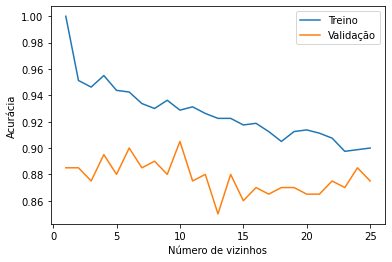

Melhor acurácia (k=10): 0.90500


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

num_neighs = np.arange(1,26)
train_accuracy = []
val_accuracy = []
best_accuracy_knn = 0.0

for i, n in enumerate(num_neighs):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(Xtrain, ytrain)
    train_accuracy.append(knn.score(Xtrain, ytrain))
    val_accuracy.append(knn.score(Xval, yval))
    print("kNN (k={}): acurácia do treino={:.5f}, acurácia da validação={:.5f}"
          .format(n, train_accuracy[i], val_accuracy[i]))
    if val_accuracy[i] > best_accuracy_knn:
        best_accuracy_knn = val_accuracy[i]
        best_knn = knn
        best_num_neighs = n

plt.plot(num_neighs, train_accuracy, label='Treino')
plt.plot(num_neighs, val_accuracy, label='Validação')
plt.ylabel('Acurácia')
plt.xlabel('Número de vizinhos')
plt.legend()
plt.show()

print('Melhor acurácia (k={}): {:.5f}'.format(best_num_neighs, best_accuracy_knn))